In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"saurabhprakashgiri","key":"f261a6e69fe6a1d89882290a405d42a9"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d zalando-research/fashionmnist

fashionmnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
! unzip fashionmnist.zip 

Archive:  fashionmnist.zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


##Importing Libraries


In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [9]:
train_df = pd.read_csv('/content/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('/content/fashion-mnist_test.csv', sep = ',')

##Exploring the train and test data

In [10]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [11]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


Spliting the train and test data into x and y arrays where x represents the image data and y represents the labels.
To do that we need to convert the dataframes into numpy arrays of float32 type which is the acceptable form for tensorflow and keras. **bold text**

In [12]:
train_data = np.array(train_df, dtype = 'float32')

In [13]:
test_data = np.array(test_df, dtype='float32')

Now let us slice the train  and test arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively.
i.e 

- x_train/x_test contains all the rows and all columns except the label column and excluding header info .
- y_train/y_test contains all the rows and first column and excluding header info . **bold text**


####  Note : Since the image data in x_train and x_test is from 0 to 255 ,  we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 

In [15]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test= test_data[:,1:]/255
y_test=test_data[:,0]

**Spliting the training data into validation and actual training data for training the model and testing it using the validation set.**

In [16]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

##Data visualization of the sample image (in 28 * 28 pixel size)

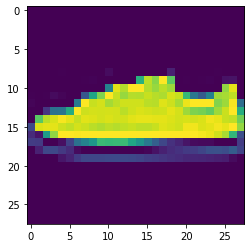

In [17]:
image = x_train[50,:].reshape((28,28))
plt.imshow(image)
plt.show()

As you can observe above the shape of shoe from the sample image

### Convolutional Neural Networks (CNN)


Defining the shape of the image before we define the model
**bold text**

In [18]:
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows,image_cols,1) # Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation


**Formating the x_train,x_test and x_validate sets.**

In [20]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)


**Visualizing the shape of x_train,x_test and x_validate**

In [21]:
print("x_train shape = {}".format(x_train.shape))
print("x_test shape = {}".format(x_test.shape))
print("x_validate shape = {}".format(x_validate.shape))

x_train shape = (48000, 28, 28, 1)
x_test shape = (10000, 28, 28, 1)
x_validate shape = (12000, 28, 28, 1)


### Defining the model 

In [22]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

#### Compiling the model

In [23]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

**Specifying callbacks for tensorboard so that we can log some data to a file and look at it using the tensorboard**

In [24]:
tensorboard = TensorBoard(
  log_dir = r'logs\{}'.format('cnn_1layer'),
  write_graph = True,
  write_grads = True,
  histogram_freq=1,
  write_images = True
)

#### Training the model

In [25]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=50,
    verbose=1,
    validation_data=(x_validate,y_validate),
    callbacks = [tensorboard]
)

Epoch 1/50
 1/94 [..............................] - ETA: 0s - loss: 2.3291 - accuracy: 0.0527WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
94/94 [==============================] - 1s 9ms/step - loss: 0.8303 - accuracy: 0.7165 - val_loss: 0.5013 - val_accuracy: 0.8265
Epoch 2/50
94/94 [==============================] - 1s 7ms/step - loss: 0.4591 - accuracy: 0.8405 - val_loss: 0.4068 - val_accuracy: 0.8611
Epoch 3/50
94/94 [==============================] - 1s 7ms/step - loss: 0.4026 - accuracy: 0.8590 - val_loss: 0.3708 - val_accuracy: 0.8740
Epoch 4/50
94/94 [==============================] - 1s 7ms/step - loss: 0.3657 - accuracy: 0.8709 - val_loss: 0.3547 - val_accuracy: 0.8768
Epoch 5/50
94/94 [==============================] - 1s 7ms/step - loss: 0.3478 -

#### Evaluating the model

In [26]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))


Test Loss : 0.2407
Test Accuracy : 0.9198


### Result

**Plotting training and validation accuracy as well as loss.**

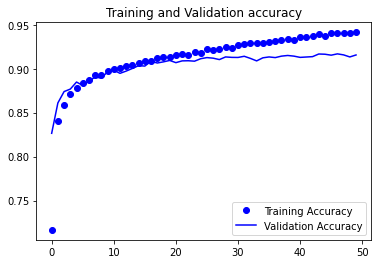

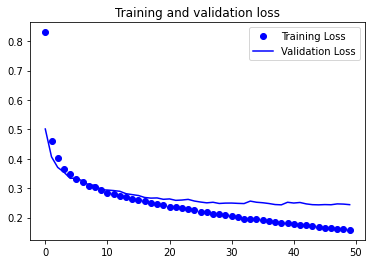

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Classification Report
We can summarize the performance of our classifier as follows

In [34]:
def classification_report(X_test,test):
    #get the predictions for the test data
    predicted_classes = cnn_model.predict_classes(X_test)

    #get the indices to be plotted
    y_true = test.iloc[:, 0]
    correct = np.nonzero(predicted_classes==y_true)[0]
    incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [35]:
num_classes =10
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.89      0.87      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.87      0.87      0.87      1000
     Class 3       0.94      0.91      0.93      1000
     Class 4       0.85      0.92      0.88      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.81      0.73      0.77      1000
     Class 7       0.96      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### Precision and Recall

**Subset of correctly predicted classes.**

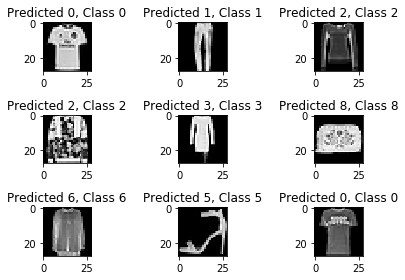

In [ ]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

**Subset of incorrectly predicted classes.**

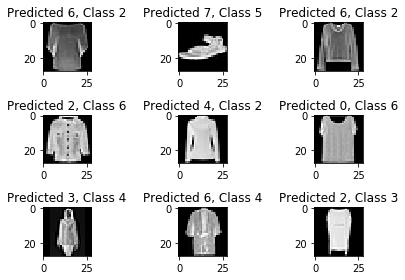

In [ ]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()